<a href="https://colab.research.google.com/github/oniauliya99/Artificial_Intelligence-Fuzzy/blob/main/Percobaan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

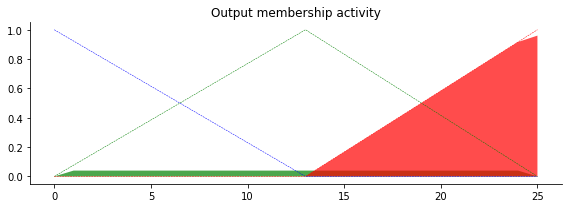

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)


serv_level_lo = fuzz.interp_membership(x_serv, qual_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, qual_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, qual_hi, 9.8)

active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

tip_activation_lo = np.fmin(active_rule1, tip_lo)

tip_activation_md = np.fmin(serv_level_md, tip_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor = 'b', alpha = 0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--',)
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor = 'g', alpha = 0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor = 'r', alpha = 0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.get_xaxis().tick_bottom()
	ax.get_yaxis().tick_left()

plt.tight_layout()



